<a href="https://colab.research.google.com/github/riyaz7781/Excel-R-assignments/blob/main/Forecasting(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


Load the Dataset

In [42]:
data1=pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx",parse_dates=True,index_col=0)
data1.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


Basic EDA

In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [44]:
data1.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

Plotting the Graph

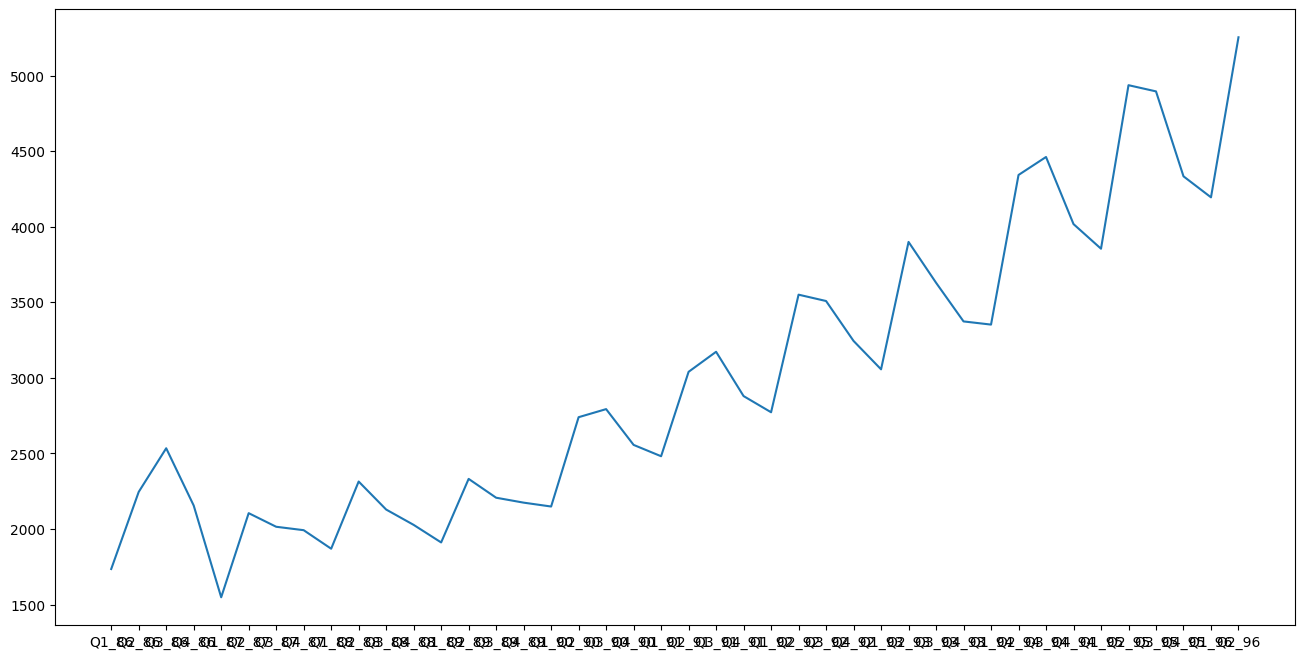

In [45]:
plt.figure(figsize=(16,8))
plt.plot(data1)

<Axes: ylabel='Density'>

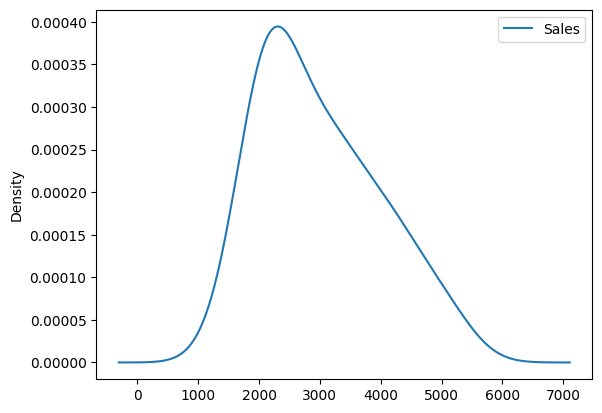

In [46]:
data1.plot(kind="kde")

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

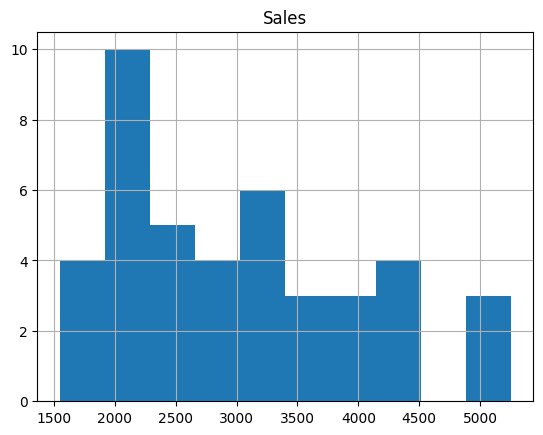

In [47]:
data1.hist()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

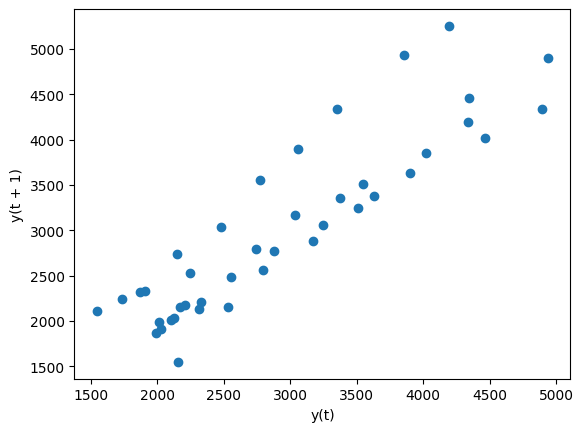

In [48]:
pd.plotting.lag_plot(data1)

Auto-Correlation Plots

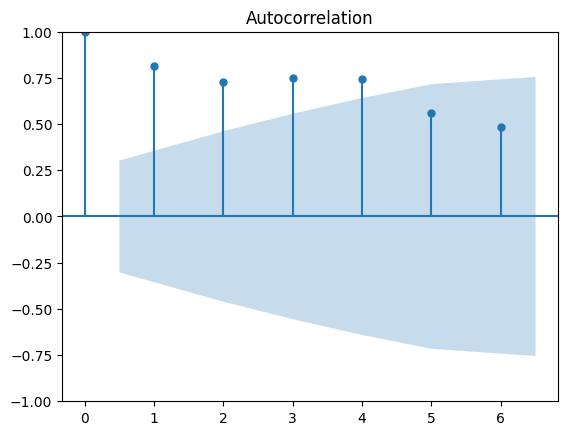

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1,lags=6)
plt.show()

Sampling and Transformations

In [50]:
coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
coke.head()

Quarter
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Name: Sales, dtype: float64

In [51]:
coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [52]:
quarter=["Q1","Q2","Q3","Q4"]

In [53]:
p = coke["Quarter"][0]
p[0:2]
coke['quarter']= 0

for i in range(42):
    p = coke["Quarter"][i]
    coke['quarter'][i]= p[0:2]

coke.head()

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1


One Hot Encoding

In [57]:
quarter_dummies = pd.DataFrame(pd.get_dummies(coke['quarter']))
quarter_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


Concatenation of entire dataset

In [55]:
coke=pd.concat([coke,quarter_dummies],axis=1)
coke.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


Transformations of Data

In [56]:
coke['t']=np.arange(1,43)
coke['t_square']=np.square(coke.t)
coke['log_Sales']=np.log(coke.Sales)
coke.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


<Axes: >

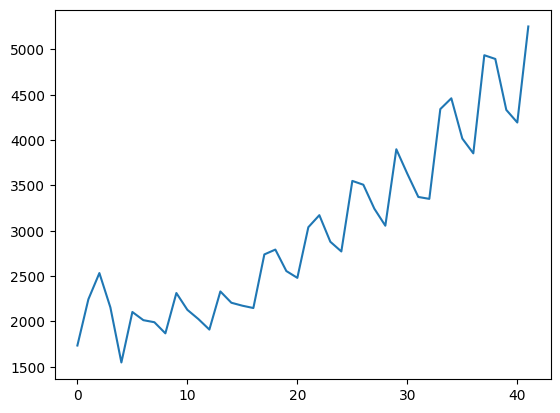

In [59]:
coke["Sales"].plot()

<Axes: xlabel='quarter', ylabel='Sales'>

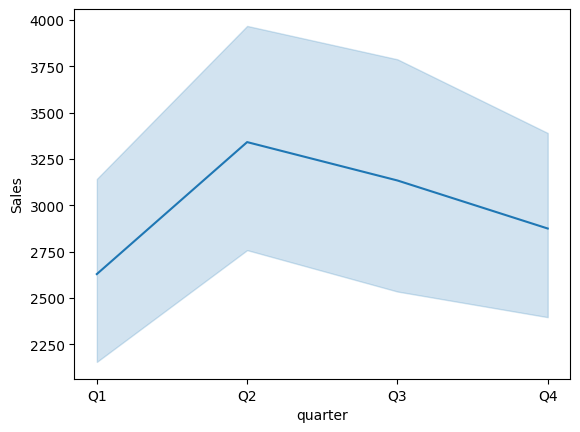

In [60]:
sns.lineplot(x="quarter",y="Sales",data=coke)

Training and Testing the Dataset

In [76]:
train=coke.head(25)
test=coke.tail(7)

Model Based Methods

In [77]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

1191.914991011939

In [78]:
Exp = smf.ols('log_Sales~t',data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

985.8997545307066

In [79]:
Quad = smf.ols('Sales~t+t_square',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

825.0423176019441

In [80]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

2223.0393341466033

In [81]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1167.8830159278116

In [82]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2249.1183555973284

In [83]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

855.1081851233588

In [84]:
mult_sea_Quad = smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(test[['Q1', 'Q2', 'Q3', 'Q4','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

4515.079135663088

Comparing the RMSE Scores

In [85]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,825.042318
6,rmse_Mult_add_sea,855.108185
1,rmse_Exp,985.899755
4,rmse_add_sea_quad,1167.883016
0,rmse_linear,1191.914991
3,rmse_add_sea,2223.039334
5,rmse_Mult_sea,2249.118356


Building the new model based on rsme score

In [86]:
model_full = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=coke).fit()

In [87]:
pred_new  = pd.Series(model_full.predict(coke))
pred_new

0     1626.592727
1     2268.402339
2     2189.685821
3     1867.242917
4     1658.311143
5     2314.185178
6     2249.533083
7     1941.154603
8     1746.287252
9     2416.225709
10    2365.638037
11    2071.323979
12    1890.521051
13    2574.523931
14    2538.000682
15    2257.751047
16    2091.012542
17    2789.079845
18    2766.621019
19    2500.435807
20    2347.761724
21    3059.893450
22    3051.499047
23    2799.378257
24    2660.768598
25    3386.964746
26    3392.634766
27    3154.578400
28    3030.033163
29    3770.293734
30    3790.028177
31    3566.036233
32    3455.555419
33    4209.880414
34    4243.679279
35    4033.751758
36    3937.335367
37    4705.724784
38    4753.588072
39    4557.724974
40    4475.373006
41    5257.826846
dtype: float64

In [88]:
coke["forecasted_Sales"] = pd.Series(np.exp(pred_new))

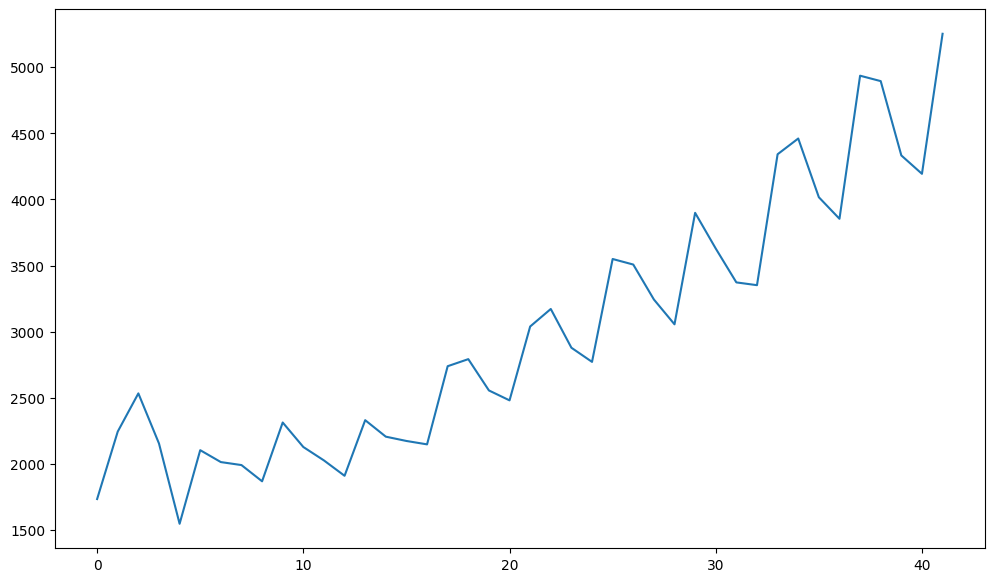

In [91]:
plt.figure(figsize=(12,7))
plt.plot(coke[['Sales','forecasted_Sales']].reset_index(drop=True))

In [92]:
Train = coke.head(35)
Test = coke.tail(7)

Moving Average

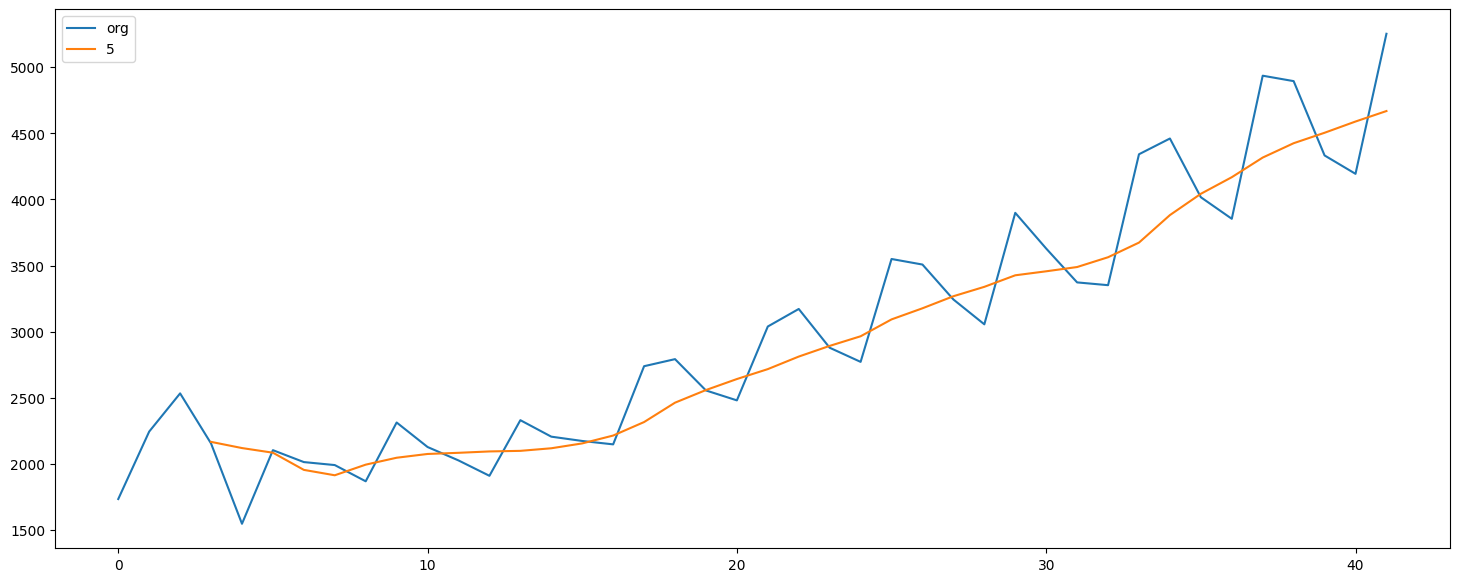

In [94]:
plt.figure(figsize=(18,7))
coke['Sales'].plot(label="org")
coke["Sales"].rolling(4).mean().plot(label=str(5))
plt.legend(loc='best')

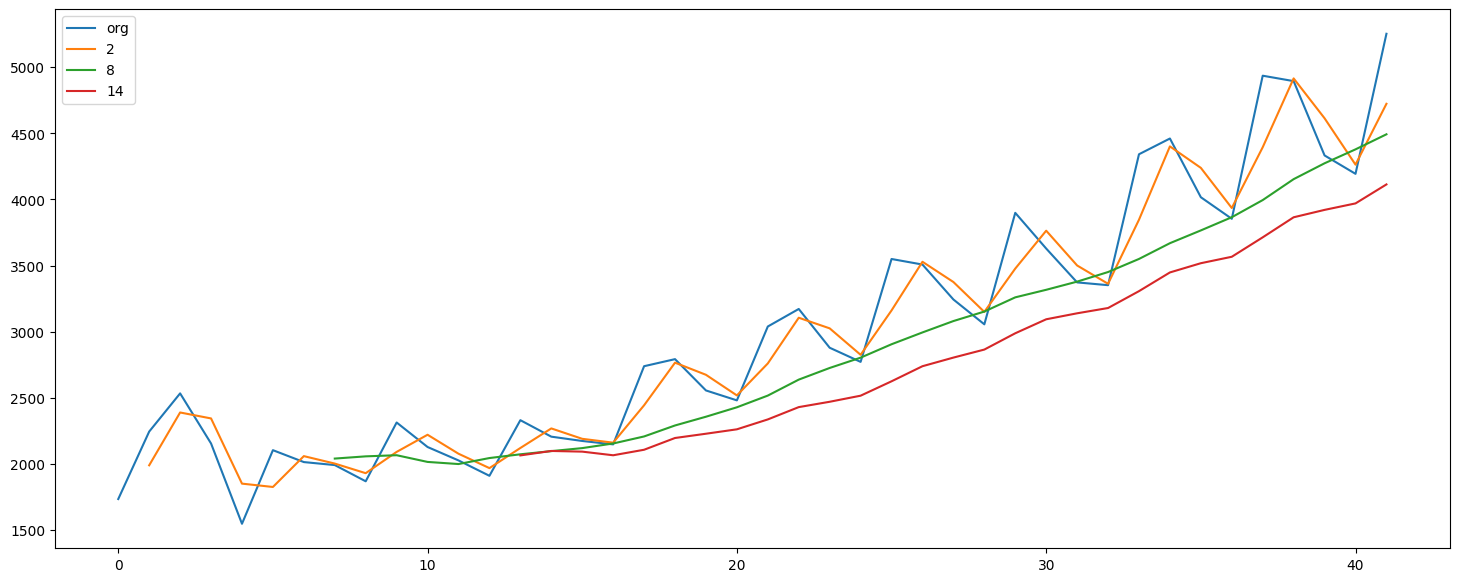

In [96]:
plt.figure(figsize=(18,7))
coke['Sales'].plot(label="org")
for i in range(2,18,6):
    coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time Series Decomposition Plots

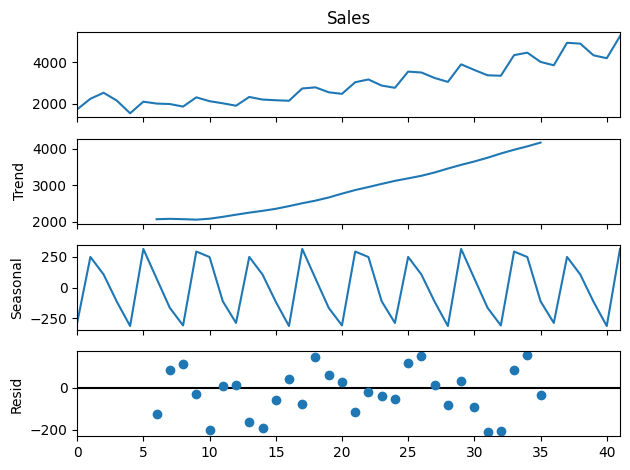

In [97]:
decompose_ts_add = seasonal_decompose(coke['Sales'], period = 12)
decompose_ts_add.plot()
plt.show()

ACF and PACF Plots

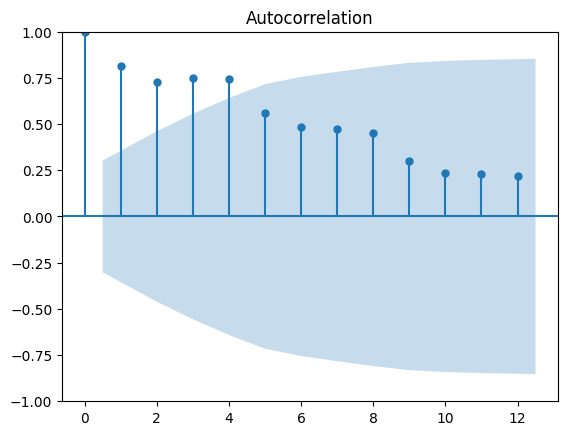

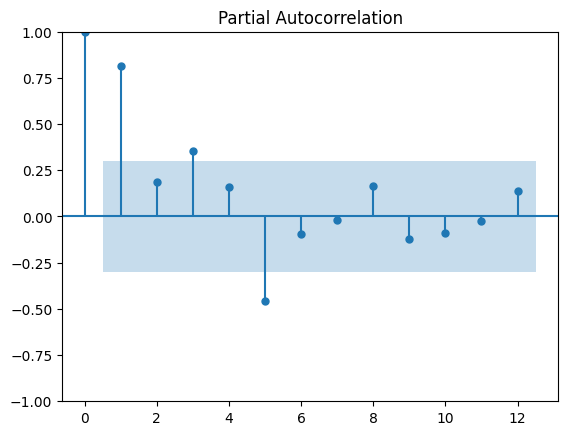

In [98]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(coke.Sales,lags=12)
tsa_plots.plot_pacf(coke.Sales,lags=12)
plt.show()

MAPE Metrics

In [99]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

Simple Exponential Smoothing

In [100]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)

16.404922356416872

Holt method

In [101]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

15.901867072128256

Holt method with additive seasonality and additive trend

In [102]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

5.241832544936149

Holt method with multiplicative seasonality and multiplicative trend

In [103]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

4.692103335212899

Final Model

In [104]:
hwe_model_mul_add = ExponentialSmoothing(coke["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [105]:
hwe_model_mul_add.forecast(7)

42    5012.147440
43    4645.260903
44    4490.053377
45    5638.551712
46    5671.720685
47    5107.131442
48    4834.680254
dtype: float64

Here we consider Holt Method with multiplicative Seasonality and Multiplicative Trend since it has minimum error